In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import shap

In [63]:
data = pd.read_csv("./data.csv")
data.sample(5)

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
26,ML-2020-37,4.17,11.0,5.0,16.52,5.0,3.18,5.0,5.0,5.0,...,0,6,0,0,0,6,2,0,0,2
66,ML-2020-90,1.67,12.0,5.0,16.09,5.0,32.61,5.0,5.0,5.0,...,0,5,2,0,0,0,0,0,0,4
68,ML-2020-92,4.17,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0,0,0,0,0,3,0,0,0,0
78,ML-2020-74,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
102,ML-2020-60,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,...,0,28,0,22,0,1,0,0,0,0


# Step-I Data Preprocessing

## Missing Value Percentage
As seen below, there is no missing value in any of the feature.

In [64]:
data.isnull().sum() / data.shape[0] * 100

ID             0.0
Week2_Quiz1    0.0
Week3_MP1      0.0
Week3_PR1      0.0
Week5_MP2      0.0
Week5_PR2      0.0
Week7_MP3      0.0
Week7_PR3      0.0
Week4_Quiz2    0.0
Week6_Quiz3    0.0
Week8_Total    0.0
Week1_Stat0    0.0
Week1_Stat1    0.0
Week1_Stat2    0.0
Week1_Stat3    0.0
Week2_Stat0    0.0
Week2_Stat1    0.0
Week2_Stat2    0.0
Week2_Stat3    0.0
Week3_Stat0    0.0
Week3_Stat1    0.0
Week3_Stat2    0.0
Week3_Stat3    0.0
Week4_Stat0    0.0
Week4_Stat1    0.0
Week4_Stat2    0.0
Week4_Stat3    0.0
Week5_Stat0    0.0
Week5_Stat1    0.0
Week5_Stat2    0.0
Week5_Stat3    0.0
Week6_Stat0    0.0
Week6_Stat1    0.0
Week6_Stat2    0.0
Week6_Stat3    0.0
Week7_Stat0    0.0
Week7_Stat1    0.0
Week7_Stat2    0.0
Week7_Stat3    0.0
Week8_Stat0    0.0
Week8_Stat1    0.0
Week8_Stat2    0.0
Week8_Stat3    0.0
Week9_Stat0    0.0
Week9_Stat1    0.0
Week9_Stat2    0.0
Week9_Stat3    0.0
Grade          0.0
dtype: float64

Also, there is no row where all the values are `0`, meaning the student has not participated in the course.

In [65]:
(data == 0).eq(0).all(axis=1).sum()

0

## Features

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

## Preliminary Feature Selection
- `ID` is irrelevant for the prediction of final grade.
- `Week8_Total` is just a aggregation of all the available grades in quizzes, mini-projects, and peer reviews. So, we can safely discard the feature. We could have discarded all the individual grades and kept the overall only. However, in that case it would not be possible to measure the impact of the grade of each assessment on the final grade.

In [67]:
data = data.drop(['ID', 'Week8_Total'], axis=1)
data.sample(5)

,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
23,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,11,...,0,0,0,0,0,0,0,0,0,0
38,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,...,0,0,0,0,0,0,0,0,0,0
21,5.00,13.0,5.0,11.74,5.0,30.63,0.0,4.67,5.0,4,...,2,4,5,0,0,5,0,0,0,3
27,3.33,14.0,5.0,18.70,5.0,21.48,5.0,3.17,4.5,6,...,0,11,6,0,0,11,1,0,0,3
80,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,27,...,0,0,0,0,0,9,0,0,0,0


## Categorizing Target Variable

In [68]:
data['Grade'] = data['Grade'].astype('category')

# Step-II Data Split

The class distribution is imbalanced. So, we must use stratified sampling during split. We kept $20\%$ data for testing and the rest of the $80\%$ for training.

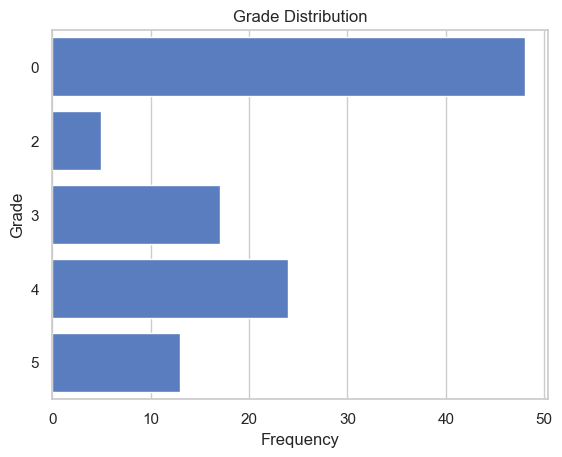

In [72]:
sns.countplot(data['Grade'])
plt.title("Grade Distribution")
plt.xlabel("Frequency")
plt.show()

In [73]:
train_x, test_x, train_y, test_y = train_test_split(
    data.drop(['Grade'], axis=1), data['Grade'], test_size=0.20, stratify=data['Grade'], random_state=25
)

In [74]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(85, 45)
(85,)
(22, 45)
(22,)


# Step-III Model Training

The primary challenge of this dataset is the imbalance between the large number of features and the limited amount of data available. As a result, more complex models are likely to suffer from overfitting. To address this issue, the use of regularization is necessary to control model complexity and improve generalization.

To mitigate overfitting, I propose employing both a simple and a complex model, with regularization applied as appropriate. For the simple model, I considered two options: Naive Bayes and K-Nearest Neighbors (KNN). However, KNN is not well-suited for high-dimensional data with a small number of data points, making Naive Bayes the more appropriate choice.

For the complex model, I evaluated Logistic Regression, Decision Tree, and Support Vector Machine (SVM). While SVM is effective in handling high-dimensional data, I selected Decision Tree due to its interpretability. Although Logistic Regression and Decision Tree both support extensive regularization techniques to prevent overfitting, the Decision Tree model offers the additional advantage of producing easily interpretable results. I excluded Artificial Neural Networks (ANN) from consideration because they typically require large amounts of data to perform well.

In summary, I have chosen Naive Bayes as the simple model and Decision Tree as the complex model, both of which are suitable given the dataset's characteristics and the need to prevent overfitting through regularization.








## Decision Tree

In [77]:
param_dist_dt = {
    'max_depth': [None, 2, 5, 10, 20, 30, 40, 50], 
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'criterion': ['gini', 'entropy']
}

In [86]:
dt_classifier = DecisionTreeClassifier()
random_search_dt = RandomizedSearchCV(
    dt_classifier, 
    param_distributions=param_dist_dt, 
    n_iter=100, 
    cv=5, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1,
    scoring='f1_macro'
)

In [87]:
random_search_dt.fit(train_x, train_y)
print("Best parameters for Decision Tree:", random_search_dt.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'}


In [88]:
pd.DataFrame(random_search_dt.cv_results_).iloc[random_search_dt.best_index_]

mean_fit_time                                                       0.001084
std_fit_time                                                        0.000321
mean_score_time                                                     0.001733
std_score_time                                                      0.001617
param_min_samples_split                                                   10
param_min_samples_leaf                                                     5
param_max_depth                                                           20
param_criterion                                                      entropy
params                     {'min_samples_split': 10, 'min_samples_leaf': ...
split0_test_score                                                   0.785714
split1_test_score                                                   0.580952
split2_test_score                                                       0.32
split3_test_score                                                   0.664286

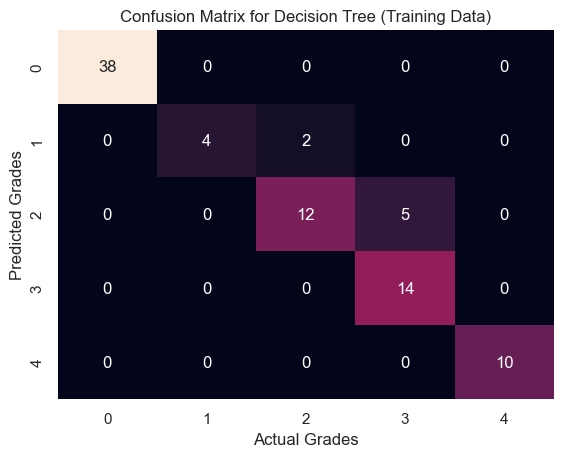

In [104]:
sns.heatmap(confusion_matrix(random_search_dt.best_estimator_.predict(train_x), train_y), annot=True, cbar=False)
plt.title("Confusion Matrix for Decision Tree (Training Data)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

## Naive Bayes

In [90]:
param_dist_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

In [91]:
gnb_classifier = GaussianNB()
random_search_gnb = RandomizedSearchCV(
    gnb_classifier, 
    param_distributions=param_dist_gnb, 
    n_iter=100, 
    cv=5, 
    verbose=1, 
    random_state=42, 
    n_jobs=-1,
    scoring='f1_macro'
)

In [92]:
random_search_gnb.fit(train_x, train_y)
print("Best parameters for Naive Bayes:", random_search_gnb.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Naive Bayes: {'var_smoothing': 0.0001519911082952933}


In [93]:
pd.DataFrame(random_search_gnb.cv_results_).iloc[random_search_gnb.best_index_]

mean_fit_time                                          0.001617
std_fit_time                                           0.000752
mean_score_time                                        0.002911
std_score_time                                         0.001817
param_var_smoothing                                    0.000152
params                 {'var_smoothing': 0.0001519911082952933}
split0_test_score                                      0.684524
split1_test_score                                      0.493853
split2_test_score                                          0.43
split3_test_score                                      0.378901
split4_test_score                                      0.645455
mean_test_score                                        0.526546
std_test_score                                         0.119403
rank_test_score                                               1
Name: 42, dtype: object

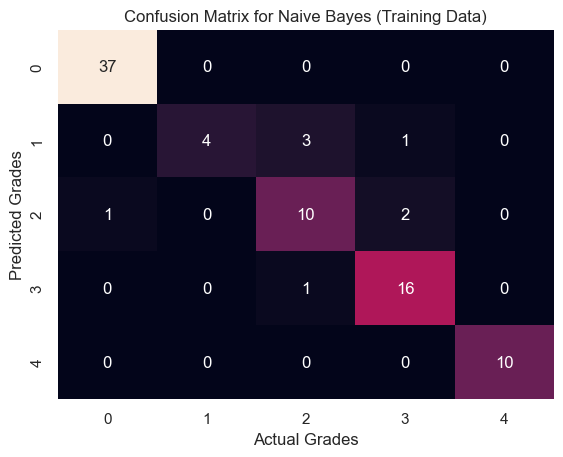

In [103]:
sns.heatmap(confusion_matrix(random_search_gnb.best_estimator_.predict(train_x), train_y), annot=True, cbar=False)
plt.title("Confusion Matrix for Naive Bayes (Training Data)")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

## Model Selection
Since the data is imbalanced, `accuracy` would not be a good measure for comparing models. I could use either `precision` or `recall`. Instead I used `F1-Score` to maximize both.

I employed a randomized search technique to find the best set of hyperparameters that reduce overfitting on the validation set. The best model of Decision Tree provided an average F1 Score of $0.63\pm0.18$. On the other hand, the best Naive Bayes model had an average F1 Socre of $0.53\pm0.12$.

There might be several reasons for Decision Tree to perform better than Naive Bayes. For example, Decision Trees are adept at capturing complex, non-linear relationships and feature interactions. If your dataset contains features that interact with each other in a non-trivial way, the Decision Tree could model these interactions more effectively. In contrast, Naive Bayes assumes conditional independence between features, meaning it does not model interactions between them. If your features are not independent, Naive Bayes would likely perform worse. From our dataset, it is obvious that the features have interactions between them. Another reason might be that it was possible to regularize decision tree by tuning different hyperparameters. However, Naive Bayes is often a high bias model with simplistic assumptions. 

# Step-IV Performance Evaluation

In [105]:
predictions  = random_search_dt.best_estimator_.predict(test_x)

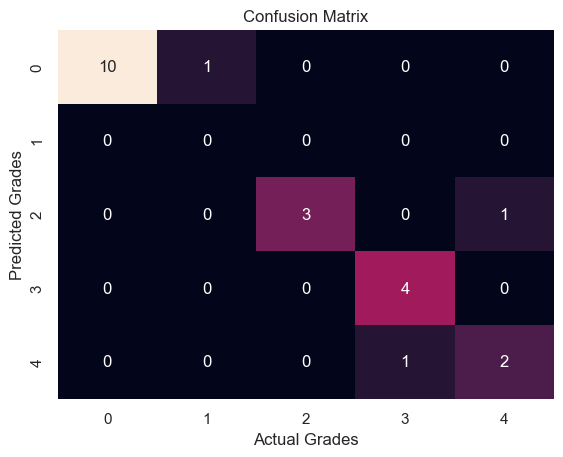

In [106]:
sns.heatmap(confusion_matrix(predictions, test_y), annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.show()

In [109]:
print(classification_report(predictions, test_y, zero_division=np.nan))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           2       0.00       nan      0.00         0
           3       1.00      0.75      0.86         4
           4       0.80      1.00      0.89         4
           5       0.67      0.67      0.67         3

    accuracy                           0.86        22
   macro avg       0.69      0.83      0.67        22
weighted avg       0.92      0.86      0.88        22



# Step-V Feature Importance

## Decision Tree Feature Rankings

In [112]:
model = random_search_dt.best_estimator_
importance_df = pd.DataFrame({
    'Feature': train_x.columns,
    'Importance': model.feature_importances_
})

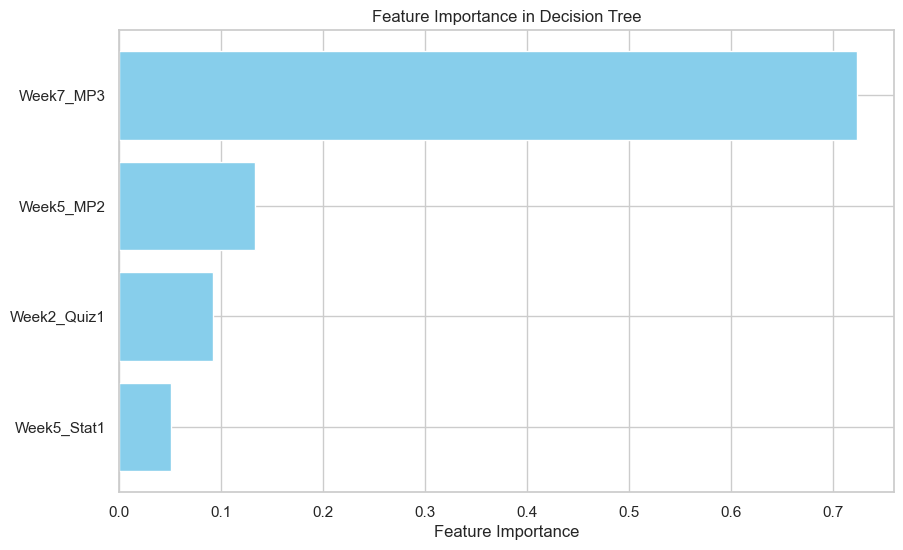

In [114]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Importance'] > 0]

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()
plt.show()

It seems that only $4$ features were actually used to predict the final grades.